Force the backend to be present time graphical before imported code sets backend to agg.

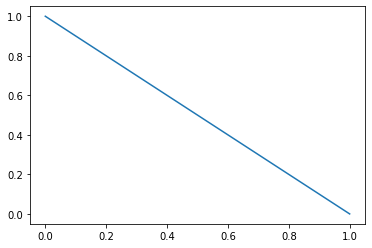

In [1]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.plot([0,1],[1,0])
plt.show()

{'amplitude': array(0.0158608) * pA, 'duration': array(1000.) * ms, 'delay': array(100.) * ms}
[[-0.054387  ]
 [-0.06545296]
 [-0.06165873]
 ...
 [-0.054387  ]
 [-0.054387  ]
 [-0.054387  ]] V
{'El': -0.054387000000000005, 'EK': -0.077, 'ENa': 0.05, 'gl': 0.0003, 'gK': 0.036000000000000004, 'gNa': 0.12, 'C': 1e-06, 'Vr': -65.0}


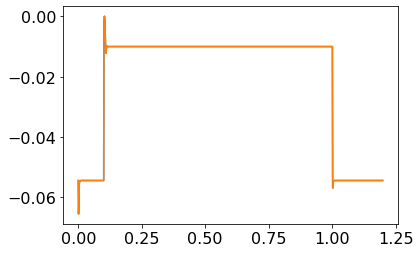

In [4]:
# coding: utf-8
import unittest

import copy

import matplotlib.pyplot as plt


from neuronunit.optimisation.optimization_management import inject_and_plot_model, dtc_to_rheo
from neuronunit.optimisation.optimization_management import inject_and_plot_passive_model

import numpy as np
from neuronunit.optimisation.data_transport_container import DataTC
from neuronunit.optimisation import model_parameters
from elephant.spike_train_generation import threshold_detection
import quantities as pq
model_parameters.MODEL_PARAMS["BHH"]

attrs_ = model_parameters.MODEL_PARAMS["BHH"]
#units = {k:v.units for k,v in attrs.items() }

attrs_ = {k1:np.mean(v1) for k1,v1 in attrs_.items() }

def inj_plot(attrs,b):
    pre_model = DataTC()

    pre_model.attrs = attrs
    pre_model.backend = b
    vm,_ = inject_and_plot_model(pre_model.attrs,b)
    print(vm)
    return vm

attrs["C"] = 1e-012

vm = inj_plot(attrs_,"BHH")
#fig, axs = plt.subplots(figsize=(40, 40))

plt.plot(vm.times,vm.magnitude)
    

{'El': -0.054387000000000005, 'EK': -0.077, 'ENa': 0.05, 'gl': 0.0003, 'gK': 0.036000000000000004, 'gNa': 0.12, 'C': 1e-06, 'Vr': -65.0}
{'amplitude': array(0.0158608) * pA, 'duration': array(1000.) * ms, 'delay': array(100.) * ms}
[[-0.054387  ]
 [-0.06545296]
 [-0.06165873]
 ...
 [-0.054387  ]
 [-0.054387  ]
 [-0.054387  ]] V


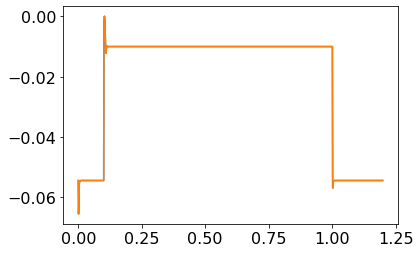

In [7]:
#fig.show()
print(attrs_)
attrs_["C"] = 1e-012

vm = inj_plot(attrs_,"BHH")
#fig, axs = plt.subplots(figsize=(40, 40))

plt.plot(vm.times,vm.magnitude)
    


In [ ]:
# coding: utf-8
import unittest

import copy

import matplotlib.pyplot as plt


from neuronunit.optimisation.optimization_management import inject_and_plot_model, dtc_to_rheo
from neuronunit.optimisation.optimization_management import inject_and_plot_passive_model

import numpy as np
from neuronunit.optimisation.data_transport_container import DataTC
from neuronunit.optimisation import model_parameters
from elephant.spike_train_generation import threshold_detection
import quantities as pq

def inj_plot(attrs,b,axs):
    pre_model = DataTC()

    pre_model.attrs = attrs
    pre_model.backend = b
    vm,_ = inject_and_plot_model(pre_model.attrs,b)
    print(vm)
    axs[cnt].plot(vm.times,vm.magnitude)
    axs[cnt].set_xlabel(vm.times.units)
    #axs[cnt].set_ylabel(vm.units)

    axs[cnt].set_title(b)
    cnt+=1
    thresh = threshold_detection(vm,0.0*pq.mV)

    if len(thresh)>0 and vm is not None:
        boolean = True
    else:
        boolean = False
    self.assertTrue(boolean)
    vm,_ = inject_and_plot_passive_model(pre_model.attrs,b)
    axs[cnt].plot(vm.times,vm.magnitude)
    axs[cnt].set_title(b)
    axs[cnt].set_xlabel(vm.times.units)
    axs[cnt].show()
    #axs[cnt].set_ylabel(vm.units)



class testCrucialBackendsSucceed(unittest.TestCase):
    def setUp(self):
        model_parameters.MODEL_PARAMS.keys()
        self.backends =  ["RAW", "HH"]
        self.other_backends =["BHH","ADEXP"]
        self.backends_complex =  ["GLIF"]
        self.model_parameters = model_parameters

    """
        self.julia_backend ="JHH"

        #raw_attrs = {k:np.mean(v) for k,v in model_parameters.MODEL_PARAMS[backend].items()}
        #self.backends = backends
    @skip        
    def test_must_pass_0j(self):
        fig, axs = plt.subplots(len(self.backends)*2+1,figsize=(40, 40))
        cnt=0
        b =  self.julia_backend
        attrs = {k:np.mean(v) for k,v in self.model_parameters.MODEL_PARAMS[b].items()}
        pre_model = DataTC()
        if str("V_REST") in attrs.keys():
            attrs["V_REST"] = -75.0
        pre_model.attrs = attrs
        pre_model.backend = b
        vm,_ = inject_and_plot_model(pre_model.attrs,b)
        axs[cnt].plot(vm.times,vm.magnitude)
        axs[cnt].set_title(b)
        cnt+=1
        thresh = threshold_detection(vm,0.0*pq.mV)

        if len(thresh)>0 and vm is not None:
            boolean = True
        else:
            boolean = False
        self.assertTrue(boolean)
        vm,_ = inject_and_plot_passive_model(pre_model.attrs,b)
        axs[cnt].plot(vm.times,vm.magnitude)
        axs[cnt].set_title(b)
        cnt+=1

        if len(vm)>0 and vm is not None:
            boolean = True
        else:
            boolean = False
        self.assertTrue(boolean)

        return True    
    """

    def test_must_pass_01(self):
        fig, axs = plt.subplots(len(self.backends)*2+1,figsize=(40, 40))
        cnt=0
        for b in self.backends:
            attrs = {k:np.mean(v) for k,v in self.model_parameters.MODEL_PARAMS[b].items()}
            pre_model = DataTC()
            if str("V_REST") in attrs.keys():
                attrs["V_REST"] = -75.0
            pre_model.attrs = attrs
            pre_model.backend = b
            vm,_ = inject_and_plot_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_xlabel(vm.times.units)

            axs[cnt].set_title(b)
            cnt+=1
            thresh = threshold_detection(vm,0.0*pq.mV)

            if len(thresh)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)
            vm,_ = inject_and_plot_passive_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_xlabel(vm.times.units)
            axs[cnt].set_ylabel(vm.magnitude[0].units)

            axs[cnt].set_title(b)
            cnt+=1

            if len(vm)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)

        return True
    def test_prefer_pass_11(self):
        fig, axs = plt.subplots(len(self.backends)*2+1,figsize=(40, 40))
        cnt=0
        for b in self.other_backends:
            attrs = {k:np.mean(v) for k,v in self.model_parameters.MODEL_PARAMS[b].items()}
            pre_model = DataTC()
            if str("V_REST") in attrs.keys():
                attrs["V_REST"] = -75.0
            pre_model.attrs = attrs
            pre_model.backend = b
            vm,_ = inject_and_plot_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_xlabel(vm.times.units)
            axs[cnt].set_ylabel(vm.magnitude.units)

            axs[cnt].set_title(b)
            cnt+=1
            thresh = threshold_detection(vm,0.0*pq.mV)

            if len(thresh)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)
            vm,_ = inject_and_plot_passive_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_xlabel(vm.times.units)
            axs[cnt].set_ylabel(vm.magnitude.units)

            axs[cnt].set_title(b)
            cnt+=1
            if len(vm)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)

        return True

    def test_prefer_pass_2(self):
        fig, axs = plt.subplots(len(self.backends)*2+1,figsize=(40, 40))
        cnt=0
        for b in self.backends_complex:
            if b in str("GLIF"):
                print(self.model_parameters.MODEL_PARAMS[b])
                attrs_ = {k:v for k,v in model_parameters.MODEL_PARAMS["GLIF"].items() if type(v) is not type(dict())}

                attrs_ = {k:v for k,v in attrs_.items() if type(v) is not type(dict()) }
                attrs_ = {k:v for k,v in attrs_.items() if type(v) is not type(None) }
                attrs_ = {k:np.mean(v) for k,v in attrs_.items() if type(v[0]) is not type(str())}
                attrs = attrs_
            else:

                attrs = {k:np.mean(v) for k,v in self.model_parameters.MODEL_PARAMS[b].items()}
            pre_model = DataTC()
            if str("V_REST") in attrs.keys():
                attrs["V_REST"] = -75.0
            pre_model.attrs = attrs
            pre_model.backend = b
            vm,_ = inject_and_plot_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_xlabel(vm.times.units)
            axs[cnt].set_ylabel(vm.units)

            axs[cnt].set_title(b)
            cnt+=1
            thresh = threshold_detection(vm,0.0*pq.mV)

            if len(thresh)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)
            vm,_ = inject_and_plot_passive_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_title(b)
            cnt+=1

            if len(vm)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)

        return True


    def test_prefer_pass_bhh(self):
        fig, axs = plt.subplots(len(self.backends)*2+1,figsize=(40, 40))
        cnt=0
        #for b in self.backends_complex:
        #if b in str("GLIF"):
        b = str("BHH")
        #print(attrs_)
        attrs = self.model_parameters.MODEL_PARAMS[b]
        for k,v in attrs.items():
            print(v,k)
            #attrs = copy.copy(attrs_)
            attrs_ = self.model_parameters.MODEL_PARAMS[b]
            #units = {k:v.units for k,v in attrs.items() }

            attrs_ = {k1:np.mean(v1) for k1,v1 in attrs_.items() }

            attrs_[k] = attrs_[k] * 1000.0 #*units
            #try:
            inj_plot(attrs_,b,axs)
            #except:
            #    pass
        for k,v in attrs.items():
            attrs_ = self.model_parameters.MODEL_PARAMS[b]
            #units = {k:v.units for k,v in attrs.items() }

            attrs_ = {k1:np.mean(v1) for k1,v1 in attrs_.items() }

            attrs_[k] = attrs_[k] * 1000.0 #*units
            #try:
            inj_plot(attrs_,b,axs)
            #except:
            #    pass
     
        #attrs_ = {k:v for k,v in model_parameters.MODEL_PARAMS["GLIF"].items() if type(v) is not type(dict())}
        #attrs_ = {k:v for k,v in attrs_.items() if type(v) is not type(dict()) }
        #attrs_ = {k:v for k,v in attrs_.items() if type(v) is not type(None) }
        #
        #attrs = attrs_
        #else:
        """
        #    attrs = {k:np.mean(v) for k,v in self.model_parameters.MODEL_PARAMS[b].items()}
        pre_model = DataTC()
        if str("V_REST") in attrs.keys():
            attrs["V_REST"] = -75.0
        pre_model.attrs = attrs
        pre_model.backend = b
        vm,_ = inject_and_plot_model(pre_model.attrs,b)
        axs[cnt].plot(vm.times,vm.magnitude)
        axs[cnt].set_xlabel(vm.times.units)
        axs[cnt].set_ylabel(vm.units)

        axs[cnt].set_title(b)
        cnt+=1
        thresh = threshold_detection(vm,0.0*pq.mV)

        if len(thresh)>0 and vm is not None:
            boolean = True
        else:
            boolean = False
        self.assertTrue(boolean)
        vm,_ = inject_and_plot_passive_model(pre_model.attrs,b)
        axs[cnt].plot(vm.times,vm.magnitude)
        axs[cnt].set_title(b)
        axs[cnt].set_xlabel(vm.times.units)
        axs[cnt].set_ylabel(vm.units)

        cnt+=1

        if len(vm)>0 and vm is not None:
            boolean = True
        else:
            boolean = False
        self.assertTrue(boolean)

        return True
        """ 
    


In [ ]:
a = testCrucialBackendsSucceed()
a.setUp()
a.test_prefer_pass_bhh()


In [ ]:
a.test_prefer_pass_2()

In [ ]:
a.test_prefer_pass_2()

In [ ]:
a.test_must_pass_01()
a.test_prefer_pass_11()